# 3. PCA

Iris dataset의 PCA를 numpy를 이용하여 구해보고, sklearn을 통해 얻은 PCA와 같은 결과를 갖는지 확인해보기

In [1]:
# Import libraries

import numpy as np
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int()

In [2]:
def load_data():
    iris = datasets.load_iris()
    X = np.array(iris.data)
    labels = np.array(iris.target)
    print( X.shape, labels.shape)
    return X, labels

In [3]:
def pca(X, dim_Y):
    
    # centralize X
    mu = X.T.mean(1)
    X_centered = X-mu
    
    # ############################################ #
    # Fill the code by following the procedure     #
    # 1. obtain covariance matrix                  #
    # 2. obtain eigenvectors by using LA.eig()     #
    # 3. obtain Y : PCA transformation of X        #
    
    cov = np.matmul(X_centered.T, X_centered)
    eigenvalues, eigenvectors = LA.eig(cov)
    Y = np.matmul(X_centered , eigenvectors[:,:dim_Y])    

    ################################################
    
    return Y

((150, 4), (150,))


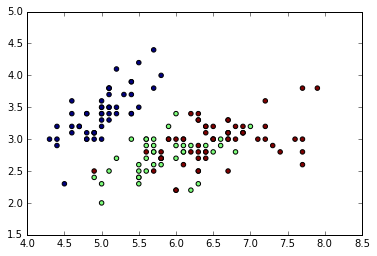

In [4]:
X, labels = load_data()
plt.scatter(X[:,0], X[:,1], c = labels)

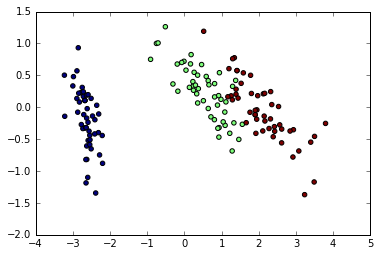

In [5]:
Y = pca(X,2)
plt.scatter(Y[:,0], Y[:,1], c = labels)

### Confirm our pca transform is alright

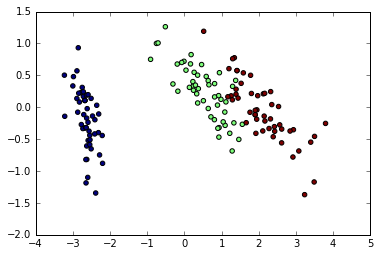

In [6]:
Z = PCA(n_components = 2).fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], c = labels)

assert np.allclose(Y,Z)